In [26]:
import matplotlib.pyplot as plt
import numpy as np
from tkinter import filedialog as fd
import os
import datetime

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print("keras:",keras.__version__)
print("tf:",tf.__version__)

keras: 2.10.0
tf: 2.10.0


In [27]:
#load dataset

#get path
test_ds_path = fd.askdirectory(title="test dataset:", initialdir=os.getcwd())

#dataset parameters
img_height = 224
img_width = 224
test_batch_size = 1

#create dataset
test_ds = keras.preprocessing.image_dataset_from_directory(
    directory=test_ds_path,
    labels='inferred',
    label_mode='categorical',
    batch_size=test_batch_size,
    color_mode = 'rgb',
    shuffle = False,
    image_size=(img_height, img_width))

#get labels and classes
dataset_labels = test_ds.class_names
num_classes = len(dataset_labels)

#prefetch dataset for speed
test_ds = test_ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#apply normalization
normalization_layer = layers.Rescaling(1./255)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

Found 320 files belonging to 4 classes.


In [28]:
#load previously trained model
load_model_path = fd.askdirectory(title="load model from:", initialdir=os.getcwd())
print(load_model_path)
if not load_model_path == "":
    model = keras.models.load_model(load_model_path,compile=False) 
    model.compile()

C:/Users/Mueller/Desktop/colab_model/content/content/trained_models


In [29]:
#do prediction on real dataset
test_predictions = model.predict(x=test_ds, steps=len(test_ds), verbose=2)
predicted_labels = test_predictions.argmax(axis=1) #get labes for predictions

#get true labels from real dataset
ds_true_labes = tf.concat([y for x, y in test_ds], axis=0)
ds_true_labes = np.argmax(ds_true_labes, axis=1)

320/320 - 2s - 2s/epoch - 8ms/step


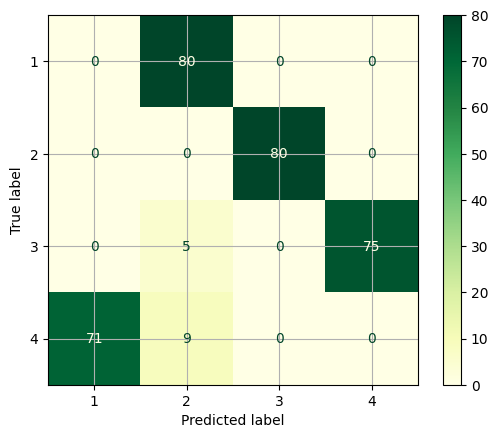

In [32]:
#calculate confusion matrix
cm = confusion_matrix(y_true=ds_true_labes, y_pred=predicted_labels)

#plot confusion matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dataset_labels)

cm_plot.plot(cmap= plt.cm.YlGn)
plt.grid(None)
